In [ ]:
import os
os.chdir('..')
print(os.getcwd())

In [ ]:
import torch

from torch import Tensor as T
import umap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

from sklearn.manifold import TSNE

In [3]:
from UMAP.func import load_model, obtain_embeddings

In [ ]:
config_path = 'UMAP/cddb_UMAP.json'
saved_file_path = 'UMAP/Checkpoints/DB=cddb,CONEC_LoRA,UMAP,Order=1,Seed=0,TimeDate_2025-10-15,Time_19-13-56,final_model.pth'

m, loader_test = load_model(config_path=config_path, saved_file_path=saved_file_path)

In [6]:
device = m._device

In [7]:
embeddings_before_training_all, embeddings_after_training_all, labels_all = obtain_embeddings(m=m, loader_test=loader_test, num_samples_per_class=200, device=device)

In [8]:
total_classes = m.total_sessions * m.class_num

for lbl in range(total_classes):
    num = sum(labels_all == lbl)
    print(f'Label: {lbl}: {num}')

Label: 0: 200
Label: 1: 200
Label: 2: 200
Label: 3: 200
Label: 4: 45
Label: 5: 45
Label: 6: 200
Label: 7: 200
Label: 8: 200
Label: 9: 200


In [9]:
embeddings_before_training_all = embeddings_before_training_all.cpu().detach().numpy()

embeddings_after_training_all = embeddings_after_training_all.cpu().detach().numpy()

labels_all = labels_all.cpu()

In [20]:
def show_UMAP(embeddings: T, labels: T, n_neighbors=10, min_dist=0.1, metric='euclidean', css_colors = [], class_names = [], title=None, save_path=None):
    assert len(css_colors) == len(class_names)
    
    if len(css_colors) > 0:
        cmap = ListedColormap(css_colors)
    else:
        cmap = 'Spectral'

    umap_2d   = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric=metric
    )
    emb       = umap_2d.fit_transform(embeddings)

    # 3) draw
    plt.figure(figsize=(10,10))
    sc = plt.scatter(emb[:,0], emb[:,1], c=labels, cmap=cmap, s=10)
    # Create custom legend with dots
    if len(class_names) > 0:
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', markerfacecolor=css_colors[i], markersize=10, label=class_names[i]) 
            for i in range(len(class_names))
            ]

        plt.legend(handles=legend_elements, loc='best', title=None)
    plt.title(title)
    plt.show()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

In [21]:
n_neighbors=10
min_dist=0.1
metric='cosine'  # 'cosine', 'euclidean'
# cmap='Spectral'
title=None

css_colors = ["blue", "skyblue", "black", "silver", "green", "lime", "red", "salmon", "gold", "yellow"]

class_names = [
    "WildDeepFake,real", "WildDeepFake,fake",
    "WhichFaceReal,real", "WhichFaceReal,fake",
    "SAN,real", "SAN,fake",
    "GauGAN,real", "GauGAN,fake",
    "BigGAN,real", "BigGAN,fake"
    ]

In [22]:
other_arguments = dict(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, title=None, css_colors=css_colors, class_names=class_names)

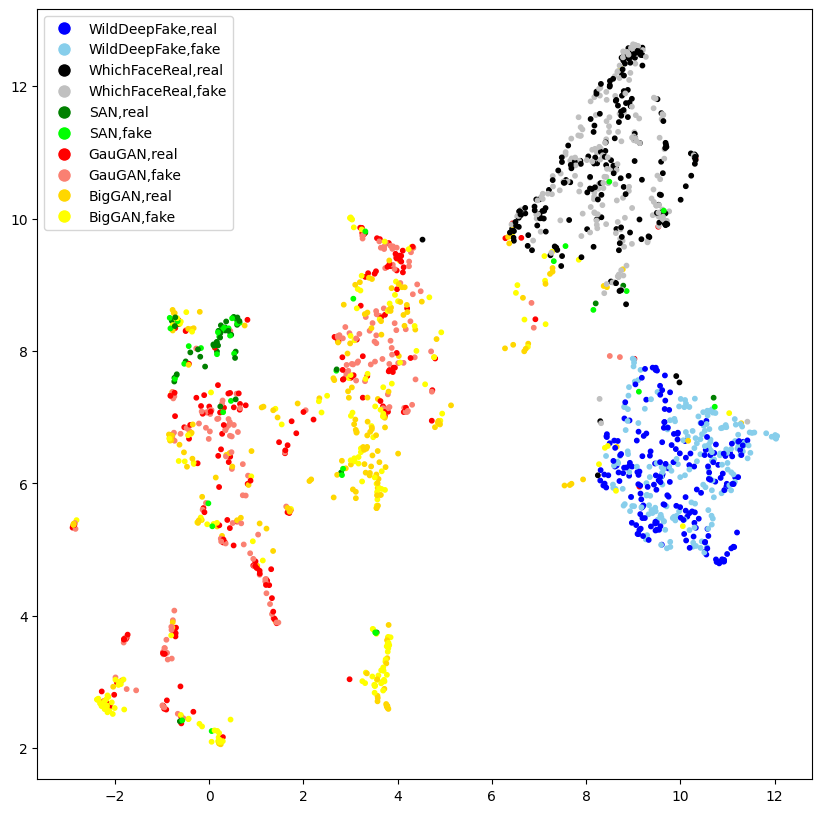

In [23]:
show_UMAP(embeddings=embeddings_before_training_all, labels=labels_all, **other_arguments)

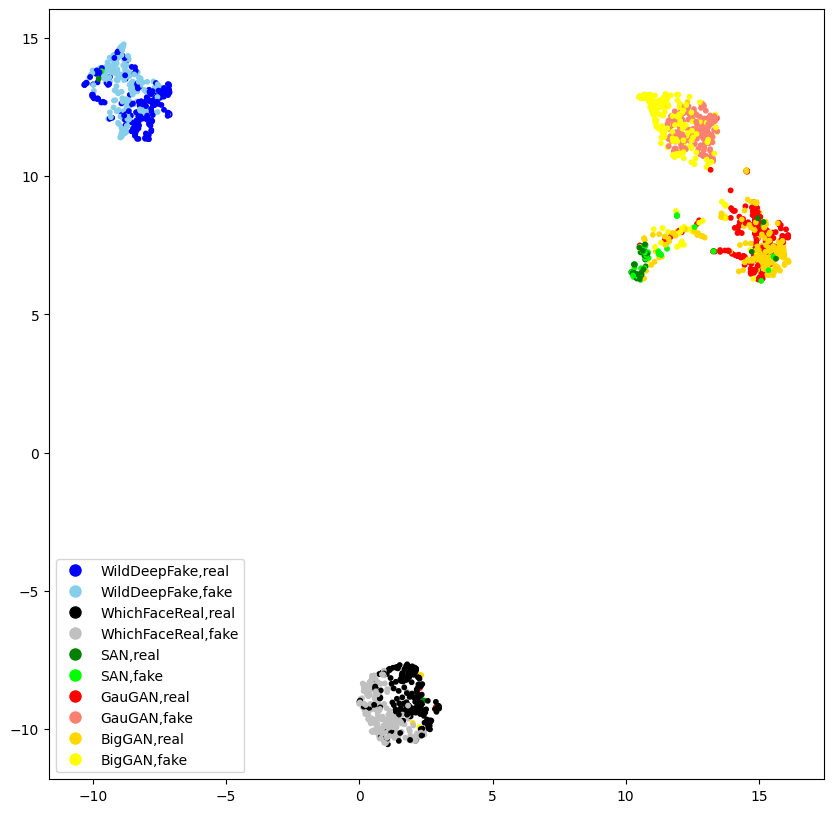

In [24]:
show_UMAP(embeddings_after_training_all, labels_all, **other_arguments)